1. To Intialize spark in local notebook please run startjupyter.sh
source /Users/gkumargaur/workspace/scala/GCP-AI-Tensor/scripts/startjupyter.sh
2. run pyspark, this will open the notebook with spark enabled

In [16]:
import pandas as pd
import warnings
import datetime
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from google.cloud import bigquery
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")
spark = SparkSession.builder \
  .config('spark.jars', 'gs://spark-lib/bigquery/spark-bigquery-latest_2.12.jar') \
  .getOrCreate()

In [17]:
df = spark.read \
  .format('bigquery') \
  .load('itd-aia-datalake.janus_graph.symbols_by_close').filter(col("Name") == 'UONE').orderBy("Date")
#df.show(10)
pndf = df.toPandas()
pndf.head(10)

,Name,Date,Open,Close,Low,High,AdjClose,Volume,record_ingestion_date,prev_close,change,change_in_percent
0,UONE,2021-03-16,5.75,5.59,5.49,5.86,5.59,351000.0,2021-03-16,NaN,0.00,NaN
1,UONE,2021-03-17,5.53,5.95,5.33,5.96,5.95,367500.0,2021-03-16,5.59,0.36,6.44
2,UONE,2021-03-18,6.65,6.01,5.94,7.30,6.01,7392200.0,2021-03-16,5.95,0.06,1.01
3,UONE,2021-03-19,6.02,5.86,5.84,6.50,5.86,1413000.0,2021-03-16,6.01,-0.15,-2.50
4,UONE,2021-03-22,5.98,5.70,5.69,6.09,5.70,346000.0,2021-03-16,5.86,-0.16,-2.73
5,UONE,2021-03-23,5.61,5.45,5.41,5.85,5.45,392000.0,2021-03-16,5.70,-0.25,-4.39
6,UONE,2021-03-24,5.50,5.38,5.33,5.81,5.38,393300.0,2021-03-16,5.45,-0.07,-1.28
7,UONE,2021-03-25,5.25,5.42,5.17,5.52,5.42,236600.0,2021-03-16,5.38,0.04,0.74
8,UONE,2021-03-26,5.41,5.30,5.13,5.67,5.30,1075600.0,2021-03-16,5.42,-0.12,-2.21
9,UONE,2021-03-29,5.31,5.34,5.17,5.43,5.34,259100.0,2021-03-16,5.30,0.04,0.75


In [18]:
pndf.set_index('Date',inplace=True)
pndf.head(10)

,Name,Open,Close,Low,High,AdjClose,Volume,record_ingestion_date,prev_close,change,change_in_percent
Date,,,,,,,,,,,
2021-03-16,UONE,5.75,5.59,5.49,5.86,5.59,351000.0,2021-03-16,NaN,0.00,NaN
2021-03-17,UONE,5.53,5.95,5.33,5.96,5.95,367500.0,2021-03-16,5.59,0.36,6.44
2021-03-18,UONE,6.65,6.01,5.94,7.30,6.01,7392200.0,2021-03-16,5.95,0.06,1.01
2021-03-19,UONE,6.02,5.86,5.84,6.50,5.86,1413000.0,2021-03-16,6.01,-0.15,-2.50
2021-03-22,UONE,5.98,5.70,5.69,6.09,5.70,346000.0,2021-03-16,5.86,-0.16,-2.73
2021-03-23,UONE,5.61,5.45,5.41,5.85,5.45,392000.0,2021-03-16,5.70,-0.25,-4.39
2021-03-24,UONE,5.50,5.38,5.33,5.81,5.38,393300.0,2021-03-16,5.45,-0.07,-1.28
2021-03-25,UONE,5.25,5.42,5.17,5.52,5.42,236600.0,2021-03-16,5.38,0.04,0.74
2021-03-26,UONE,5.41,5.30,5.13,5.67,5.30,1075600.0,2021-03-16,5.42,-0.12,-2.21


In [19]:
print('There are {} number of days in the dataset.'.format(pndf.shape[0]))

There are 65 number of days in the dataset.


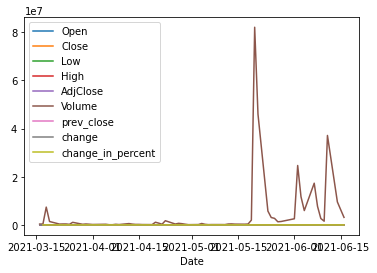

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
pndf.plot();

In [21]:
prices = pndf['Close']
volumes = pndf['Volume']

In [22]:
volumes.tail()

Date
2021-06-10     1548800.0
2021-06-11    37137000.0
2021-06-14     9538900.0
2021-06-15     6310500.0
2021-06-16     3130482.0
Name: Volume, dtype: float64

In [23]:
prices.head()

Date
2021-03-16    5.59
2021-03-17    5.95
2021-03-18    6.01
2021-03-19    5.86
2021-03-22    5.70
Name: Close, dtype: float64

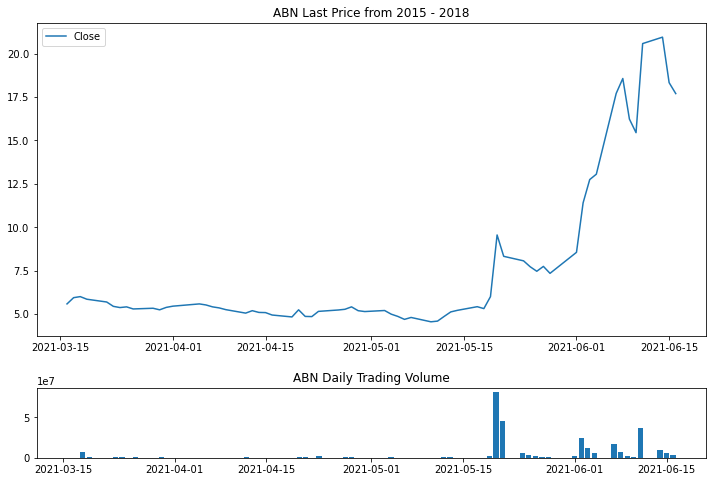

In [24]:
# The top plot consisting of dailing closing prices
top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
top.plot(prices.index, prices, label='Close')
plt.title('ABN Last Price from 2015 - 2018')
plt.legend(loc=2)

# The bottom plot consisting of daily trading volume
bottom = plt.subplot2grid((4, 4), (3,0), rowspan=1, colspan=4)
bottom.bar(volumes.index, volumes)
plt.title('ABN Daily Trading Volume')

plt.gcf().set_size_inches(12, 8)
plt.subplots_adjust(hspace=0.75)

([<matplotlib.lines.Line2D at 0x11b47fd90>,
  <matplotlib.patches.Rectangle at 0x11b613150>])

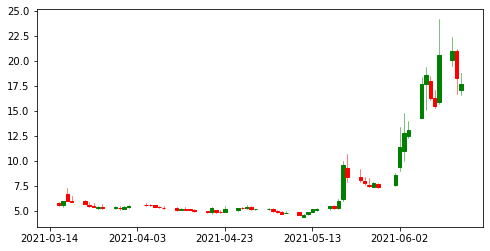

In [25]:
%matplotlib inline
import mplfinance as mpf 
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt


df_subset = pndf
df_subset.index = pd.to_datetime(df_subset.index)
df_subset['Date'] = df_subset.index.map(mdates.date2num)
df_ohlc = df_subset[['Date','Open', 'High', 'Low', 'Close']]

figure, ax = plt.subplots(figsize = (8,4))
formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(ax, 
                 df_ohlc.values, 
                 width=0.8, 
                 colorup='green', 
                 colordown='red')


In [26]:
#mpf.plot(df_subset, type='candle', style='charles',title='S&P 500',ylabel='Price ($)',ylabel_lower='Shares \nTraded',volume=True, mav=(3,6,9))

In [27]:
print (df_ohlc.dtypes)

Date     float64
Open     float64
High     float64
Low      float64
Close    float64
dtype: object


In [28]:
dcdf = df_ohlc[['Close']]
dcdf.head(10)

,Close
Date,
2021-03-16,5.59
2021-03-17,5.95
2021-03-18,6.01
2021-03-19,5.86
2021-03-22,5.70
2021-03-23,5.45
2021-03-24,5.38
2021-03-25,5.42
2021-03-26,5.30


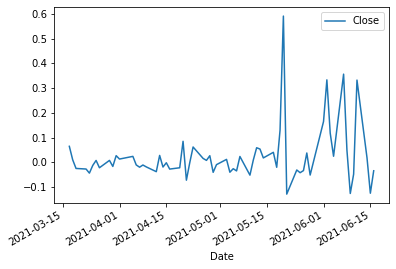

In [29]:
daily_changes = dcdf.pct_change(periods=1)
daily_changes.plot();

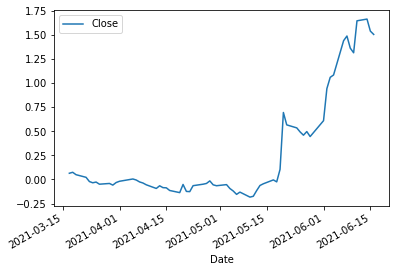

In [30]:
df_cumsum = daily_changes.cumsum()
df_cumsum.plot();

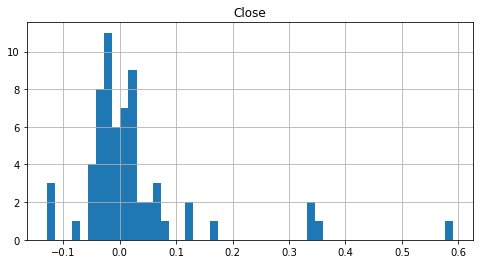

In [31]:
daily_changes.hist(bins=50, figsize=(8, 4));

In [32]:
daily_changes.describe()

,Close
count,64.000000
mean,0.023533
std,0.114869
min,-0.128661
25%,-0.028432
50%,-0.002007
75%,0.026917
max,0.590682


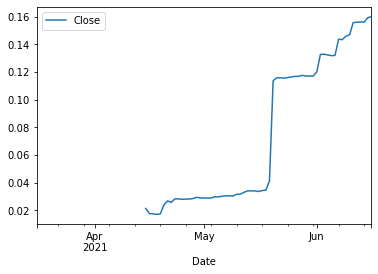

In [33]:
df_filled = dcdf.asfreq('D', method='ffill')
df_returns = df_filled.pct_change()
df_std = df_returns.rolling(window=30, min_periods=30).std()
df_std.plot();

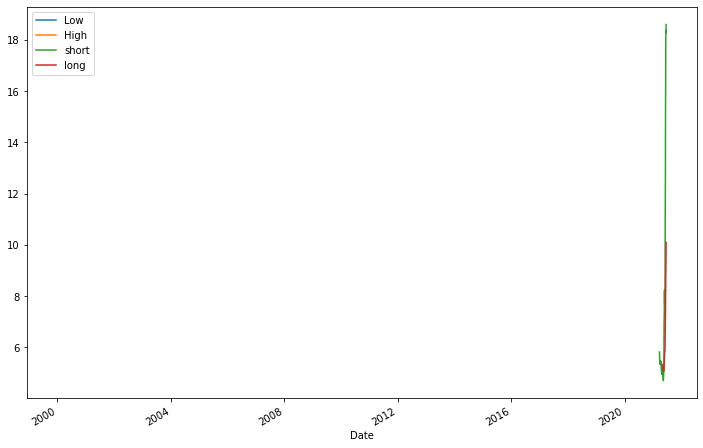

In [34]:
df_filled = pndf.asfreq('D', method='ffill')
df_last = pndf['Close']

series_short = df_last.rolling(window=5, min_periods=5).mean()
series_long = df_last.rolling(window=30, min_periods=30).mean()

df_sma = pd.DataFrame(columns=['Low', 'High'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(12, 8));